# Parte 1: Selección y Análisis de la Base de Datos

1. **Selección de la Base de Datos**

    Elegí una base de datos de Kaggle (https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) la cual provee información para analizar si los pasajeros de un avión estarán satisfechos o no.
    

In [3]:
import pandas as pd

data = pd.read_csv('pasajeros.csv', delimiter=',', index_col=0)
df = pd.DataFrame(data)

df


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


Ajustamos los datos para un análisis más detallado, convirtiendo valores complejos del DataFrame en simples.

In [5]:
gender = {
    'Male':   0,
    'Female': 1   
}

cus_type = {
    'Loyal Customer':    0, 
    'disloyal Customer': 1   
}

age = {
    (7, 17):  0,
    (17, 27): 1,
    (27, 37): 2,
    (37, 47): 3,
    (47, 57): 4,
    (57, 67): 5,
    (67, 77): 6,
    (77, 86): 7
}


travel_type = {
    'Business travel': 0,  
    'Personal Travel': 1   
}

clasS = {
    'Business': 2,  
    'Eco':      1,
    'Eco Plus': 0
}

flight_dist = {
    (31, 650):    0,
    (650, 1269):  1,
    (1269, 1888): 2,
    (1888, 2507): 3,
    (2507, 3126): 4,
    (3126, 3745): 5,
    (3745, 4364): 6,
    (4364, 4984): 7
}     

'''
'Inflight wifi service'
'Departure/Arrival time convenient',
'Ease of Online booking',
'Gate location', 
'Food and drink', 
'Online boarding', 
'Seat comfort',
'Inflight entertainment', 
'On-board service', 
'Leg room service',
'Baggage handling', 
'Checkin service', 
'Inflight service',
'Cleanliness'

Son servicios que ya estan calificados con valores del 0 al 5

'''

dep_delay = {        # RETRASO DE DESPEGUE DEL AVION EN MINUTOS
    (0, 20):     0,  # 19' de espera
    (20, 40):    1,  # entre 20' y 39' de espera
    (40, 60):    2,  # entre 40' y 59' de espera
    (60, 120):   3,  # entre 1hr y casi 2hr de espera
    (120, 240):  4,  # entre 2hr y casi 4hr de espera
    (240, 480):  5,  # entre 4hr y casi 8hr de espera
    (480, 720):  6,  # entre 8hr y casi 12hr de espera
    (720, 1129): 7   # entre 12hr y casi 19hr de espera
}

arr_delay = {        # RETRASO DE ATERRIZAJE DEL AVION EN MINUTOS
    (0, 20):     0,  # 19' de espera
    (20, 40):    1,  # entre 20' y 39' de espera
    (40, 60):    2,  # entre 40' y 59' de espera
    (60, 120):   3,  # entre 1hr y casi 2hr de espera
    (556, 694):  4,  # entre 2hr y casi 4hr de espera
    (695, 833):  5,  # entre 4hr y casi 8hr de espera
    (834, 972):  6,  # entre 8hr y casi 12hr de espera
    (973, 1111): 7   # entre 12hr y casi 19hr de espera
}

satisfaction = {
    'satisfied':                1, 
    'neutral or dissatisfied':  0,
    'disatisfied':              0
}

Reemplazo los valores e imprimo el DataFrame actualizado

In [6]:
def reemplazo_dic(valores, rango):
    for rango_dic, group in rango.items():
        if rango_dic[0] <= valores <= rango_dic[1]:
            return group
    return -1

df['Age'] = df['Age'].apply(lambda x: reemplazo_dic(x, age))
df['Flight Distance'] = df['Flight Distance'].apply(lambda x: reemplazo_dic(x, flight_dist))
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].apply(lambda x: reemplazo_dic(x, dep_delay))
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].apply(lambda x: reemplazo_dic(x, arr_delay))

reemplazo = {
    'Gender':         gender,
    'Customer Type':  cus_type,
    'Type of Travel': travel_type,
    'Class':          clasS,
    'satisfaction':   satisfaction
}

for col, rep in reemplazo.items():
    if col in df.columns:
        df[col] = df[col].replace(rep)
    
df

C:\Users\Urano\AppData\Local\Temp\ipykernel_6052\3908273154.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace(rep)


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,1,0,4,0,1,0,5,4,3,...,5,5,5,5,2,5,5,2,2,1
1,90035,1,0,2,0,2,4,1,1,3,...,4,4,4,4,3,4,5,0,0,1
2,12360,0,1,1,0,1,0,2,0,2,...,2,4,1,3,2,2,2,0,0,0
3,77959,0,0,3,0,2,5,0,0,0,...,1,1,1,1,3,1,4,0,0,1
4,36875,1,0,4,0,1,1,2,3,4,...,2,2,2,2,4,2,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,78463,0,1,2,0,2,0,3,3,3,...,4,3,2,4,4,5,4,0,0,0
25972,71167,0,0,1,0,2,0,4,4,4,...,4,4,5,5,5,5,4,0,0,1
25973,37675,1,0,0,1,1,1,2,5,1,...,2,4,3,4,5,4,2,0,0,0
25974,90086,0,0,0,0,2,1,3,3,3,...,4,3,2,5,4,5,4,0,0,1


2. **Estudio de Factibilidad**

    **Volumen de datos**: El conjunto de datos utilizado consta de aproximadamente 26000 registros (como se ve en el cuadro normalizado, la fila 'count' indica que no hay valores faltantes en el conjunto de datos). Esta cantidad de datos se considera adecuada para el análisis y la modelización debido a que representa adecuadamente a la población objetivo, (considerando la variedad) capturamos diversidad, generando un aumento de la confianza en los resultados obtenidos. Además será posible construir una red mas precisa y generalizable, pudiendo aplicarla a situaciones reales.

    **Correlación de Variables:**

In [7]:
df_stats = df.describe().T                          # Estadisticas descriptivas (ED) del DataFrame (DF) traspuestas para facilitar la normalización
df_n = (df - df_stats['mean']) / df_stats['std']    # Normalizo el DF, a cada valor le resto la media y lo divido por la desviación estándar
matriz_correlacion = df_n.corr()

print("Matriz de Correlación:")
matriz_correlacion

Matriz de Correlación:


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.004371,0.006700,0.011660,-0.006564,0.105987,0.086148,-0.030303,-0.002502,0.010389,...,-0.001078,0.056544,0.041921,0.073085,0.079521,0.076587,0.020411,-0.010520,-0.009635,0.010965
Gender,0.004371,1.000000,0.027878,-0.009328,-0.019930,-0.006411,0.006295,0.006323,-0.008417,-0.001703,...,0.005217,0.000423,-0.028051,-0.032202,-0.000079,-0.034890,0.011605,-0.003441,0.004510,-0.007335
Customer Type,0.006700,0.027878,1.000000,-0.301471,-0.307827,-0.044415,-0.225722,0.001333,-0.206864,-0.012340,...,-0.090418,-0.044628,-0.042757,0.025470,-0.027565,0.025729,-0.072150,0.009880,0.012005,-0.179632
Age,0.011660,-0.009328,-0.301471,1.000000,-0.020569,0.112204,0.098147,0.009735,0.035250,0.012463,...,0.070357,0.056021,0.033563,-0.046784,0.026233,-0.054592,0.049670,-0.007699,-0.000256,0.121275
Type of Travel,-0.006564,-0.019930,-0.307827,-0.020569,1.000000,-0.485258,-0.264926,-0.109021,0.246425,-0.136350,...,-0.171904,-0.072902,-0.142869,-0.039824,0.014292,-0.027235,-0.106232,-0.012520,-0.011844,-0.453268
Class,0.105987,-0.006411,-0.044415,0.112204,-0.485258,1.000000,0.422584,0.032293,-0.076170,0.098329,...,0.199558,0.222258,0.204803,0.176942,0.158999,0.161973,0.144021,-0.011763,-0.012344,0.443715
Flight Distance,0.086148,0.006295,-0.225722,0.098147,-0.264926,0.422584,1.000000,0.004462,-0.014432,0.058904,...,0.137178,0.116328,0.135053,0.068358,0.073745,0.065724,0.105226,-0.004899,-0.008619,0.293362
Inflight wifi service,-0.030303,0.006323,0.001333,0.009735,-0.109021,0.032293,0.004462,1.000000,0.349137,0.710684,...,0.201782,0.113658,0.159699,0.118199,0.046046,0.108419,0.125768,-0.012750,-0.017035,0.280395
Departure/Arrival time convenient,-0.002502,-0.008417,-0.206864,0.035250,0.246425,-0.076170,-0.014432,0.349137,1.000000,0.440230,...,-0.022326,0.060982,0.003373,0.065684,0.082461,0.067804,-0.007670,-0.001689,-0.000424,-0.064798
Ease of Online booking,0.010389,-0.001703,-0.012340,0.012463,-0.136350,0.098329,0.058904,0.710684,0.440230,1.000000,...,0.044715,0.039988,0.116754,0.040685,-0.000108,0.035769,0.010974,-0.000412,-0.001006,0.157709


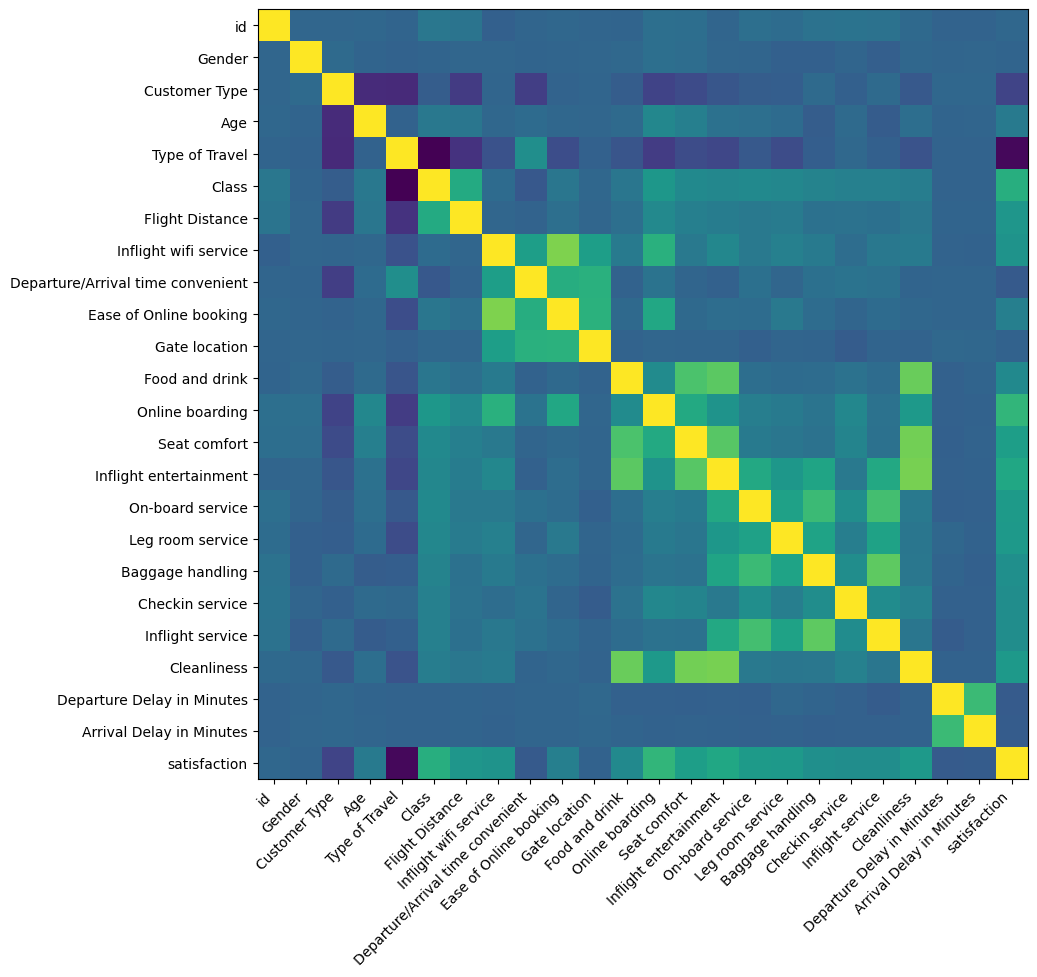

In [8]:
import matplotlib.pyplot as plt
import numpy as np

labels = df_n.columns.to_list()
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow((df_n.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(df_n.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(df_n.columns.to_list(), ha='right');

1.  **'Id'** y **'Gender'** tienen una correlación muy débil con las otras variables del conjunto de datos. Se puede decir que no están relacionados y no voy a tenerlos en cuenta a la hora de realizar la Red.

2.  **'Departure/Arrival time convenient'** y **'Gate location'** tampoco tienen relación respecto a la satisfacción teniendo en cuenta la baja correlación, por lo tanto tampoco los tendré en cuenta.

3.  **'Departure Delay in Minutes'** y **'Arrival Delay in Minutes'** tiene alta correlación entre sí, indica que cuando el avión se retrasa en la salida también se retrasa en la llegada, lo cual es lógico, pero no es relevante observando el resto de los aspectos de la experiencia del cliente.

4.  **'Type of Travel'** presenta una correlación negativa alta con la satisfacción, esto significa que los clientes desleales tienden a tener niveles de satisfacción más bajos en comparación con los clientes leales, lo que podría indicar que se necesite abordar la mejora de la retención de clientes. 

5. **'Class'** tiene correlación directa, cuanto mejor sea la clase del vuelo, mayor satisfacción tendrá el cliente lo cual si bien es lógico, podría indicar que se debe mejorar la calidad del servicio en las clases no preferenciales. 


 

**Deteccion de Valores Atípicos y Mediana**

Estadísticas descriptivas del DataFrame actualizado

In [9]:
df = df.drop(columns=['id','Gender','Departure/Arrival time convenient','Gate location','Departure Delay in Minutes','Arrival Delay in Minutes'])
df.to_csv("pasajeros_actualizado.csv", index=False)
df_stats = df.describe().T                          
df_n = (df - df_stats['mean']) / df_stats['std']
df_n.describe()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04,2.597600e+04
mean,-2.078890e-17,-4.814272e-17,1.723290e-17,1.200833e-16,-3.111497e-17,-7.385530e-18,5.470763e-18,3.774827e-17,-1.259643e-16,-8.418137e-17,-5.812686e-17,-3.152527e-17,-1.159802e-16,-7.973637e-17,5.477602e-17,1.649435e-16,-1.217245e-16,-2.930278e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.760305e-01,-1.765356e+00,-6.633657e-01,-2.256239e+00,-8.489200e-01,-2.040421e+00,-1.951076e+00,-2.414823e+00,-2.406181e+00,-1.855345e+00,-2.508970e+00,-2.640741e+00,-2.540196e+00,-2.238150e+00,-1.823144e+00,-3.090804e+00,-2.490829e+00,-8.845588e-01
25%,-4.760305e-01,-1.115650e+00,-6.633657e-01,-6.529106e-01,-8.489200e-01,-5.427247e-01,-5.355991e-01,-9.127652e-01,-9.307498e-01,-1.097821e+00,-1.014536e+00,-1.080786e+00,-1.023738e+00,-5.382279e-01,-2.475118e-01,-5.498972e-01,-9.749082e-01,-8.845588e-01
50%,-4.760305e-01,1.837615e-01,-6.633657e-01,-6.529106e-01,-2.340542e-01,2.061235e-01,1.721393e-01,-1.617361e-01,5.446816e-01,4.172273e-01,4.798976e-01,4.791685e-01,4.927206e-01,3.117331e-01,-2.475118e-01,2.970717e-01,-2.169478e-01,-8.845588e-01
75%,-4.760305e-01,8.334672e-01,1.507406e+00,9.504175e-01,3.808115e-01,9.549718e-01,8.798778e-01,5.892930e-01,5.446816e-01,1.174751e+00,4.798976e-01,4.791685e-01,4.927206e-01,1.161694e+00,5.403041e-01,1.144041e+00,5.410126e-01,1.130464e+00
max,2.100625e+00,2.782584e+00,1.507406e+00,9.504175e-01,3.455140e+00,1.703820e+00,1.587616e+00,1.340322e+00,1.282397e+00,1.174751e+00,1.227115e+00,1.259146e+00,1.250950e+00,1.161694e+00,1.328120e+00,1.144041e+00,1.298973e+00,1.130464e+00


**Media y Desviación Estándar:** ('mean' y 'std') La media de todas las columnas es muy cercana a cero y la desviación estándar es aproximadamente uno ya que los datos han sido centrados en cero y escalados para tener una desviación estándar de uno.
 
**Mínimo y Máximo:** ('min' y 'max') Los valores mínimos y máximos varían entre -2 y 2 aproximadamente en la mayoría de las columnas. Esto es consistente con la normalización estándar ya que los datos normalizados estan dentro de un rango pequeño.


In [10]:
df.describe()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000
mean,0.184747,2.717162,0.305590,1.407222,1.380659,2.724746,2.756775,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,0.438982
std,0.388100,1.539158,0.460666,0.623703,1.626371,1.335384,1.412951,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,0.496272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,0.000000,3.000000,0.000000,1.000000,1.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,0.000000,4.000000,1.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,1.000000
max,1.000000,7.000000,1.000000,2.000000,7.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


**Percentiles:** Los percentiles muestran cómo se distribuyen los datos normalizados. El percentil 25% indica que al menos el 25% de los datos están por debajo de cierto valor, mientras que el percentil 75% indica que al menos el 75% de los datos están por debajo de otro valor. Personalmente me resulto más cómodo observarlo sin normalizar ya que el percentil 50% representa la mediana y se ve que tanto se alejan el 25% y el 75%, facilitando la detección de casos atípicos que a simple vista no se observan.